Vraag A. 1.

In [8]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/Users/martijn/Documents/belangrijk/Complex/SFHH2025.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Create an undirected graph from the dataset
G = nx.Graph()

# Add edges, ignoring time steps
edges = df[['id1', 'id2']].drop_duplicates().values.tolist()
G.add_edges_from(edges)

# 1. Number of nodes (N)
N = len(G.nodes())

# 2. Number of links (L)
L = len(G.edges())

# 3. Compute degree of each node
degrees = np.array([d for _, d in G.degree()])

# 4. Compute the average degree E[D]
E_D = np.mean(degrees)

# 5. Compute the standard deviation of the degree sqrt(Var[D])
std_D = np.std(degrees)

# Print results
print("Number of nodes (N):", N)
print("Number of links (L):", L)
print("Average degree (E[D]):", E_D)
print("Standard deviation of the degree (sqrt(Var[D])):", std_D)


Number of nodes (N): 401
Number of links (L): 9415
Average degree (E[D]): 46.957605985037404
Standard deviation of the degree (sqrt(Var[D])): 29.918521078014955


A. 2.

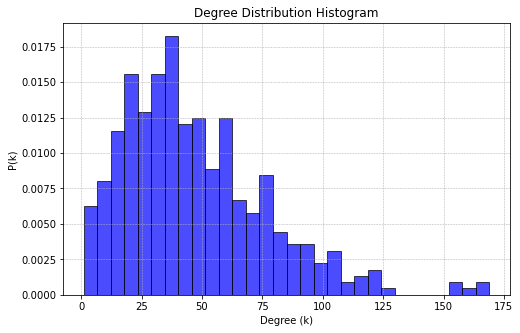

In [4]:
# Compute degree of each node
degrees = np.array([d for _, d in G.degree()])

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=30, color="blue", alpha=0.7, edgecolor="black", density=True)

# Set y-axis to log scale
# plt.yscale("log")

# Labels and title
plt.xlabel("Degree (k)")
plt.ylabel("P(k)")
plt.title("Degree Distribution Histogram")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


Lijkt op ER random model. later nog verder uitwerken

Vraag A. 3.

In [5]:
assortativity = nx.degree_assortativity_coefficient(G)
print("Degree assortativity coefficient (ρD):", assortativity)


Degree assortativity coefficient (ρD): -0.08190596963063947


ρ D <0 (Disassortative Mixing): High-degree nodes tend to connect to low-degree nodes. This is often seen in technological and biological networks (e.g., power grids, metabolic networks).If your dataset represents a contact network, a positive assortativity (ρD>0ρ D​	 >0) suggests that individuals with many contacts tend to interact with other well-connected individuals. A negative assortativity (ρD<0ρ D<0) suggests that well-connected individuals interact more frequently with those who have fewer connections, which is often seen in epidemic spread models.



Vraag A.4.

In [6]:
clustering_local = nx.clustering(G)  # Returns a dictionary {node: c_i}
C_avg = nx.average_clustering(G)
print("Average clustering coefficient (C):", C_avg)



Average clustering coefficient (C): 0.2812358620467742


Vraag A.5.

In [7]:
E_H = nx.average_shortest_path_length(G)
print("Average hopcount (E[H]):", E_H)
H_max = nx.diameter(G)
print("Network diameter (Hmax):", H_max)


Average hopcount (E[H]): 1.9547007481296759
Network diameter (Hmax): 4


Physical Meaning
Small E[H]E[H] → The network is well-connected; on average, nodes are close to each other.Large E[H]E[H] → Nodes are far apart, meaning communication or spreading processes take more steps.Small Hmax⁡H max​	  → The network is compact; the worst-case path is short.Large Hmax⁡H max​	  → The network has long chains or poorly connected parts.


Misschien nog ff specifiseren wat small en wat large is.

Vraag A.6.

In [8]:
E_H = nx.average_shortest_path_length(G)
print("Average shortest path length (E[H]):", E_H)
C = nx.average_clustering(G)
print("Clustering coefficient (C):", C)
N = G.number_of_nodes()
L = G.number_of_edges()
C_random = L / (N * (N - 1) / 2)
print("Expected clustering coefficient for random network (C_random):", C_random)


Average shortest path length (E[H]): 1.9547007481296759
Clustering coefficient (C): 0.2812358620467742
Expected clustering coefficient for random network (C_random): 0.11739401496259351


Vraag A.7.

In [9]:
# Extract the link weights from the dataset
weights = df.groupby(['id1', 'id2']).size().values  # Counts occurrences per (id1, id2) pair


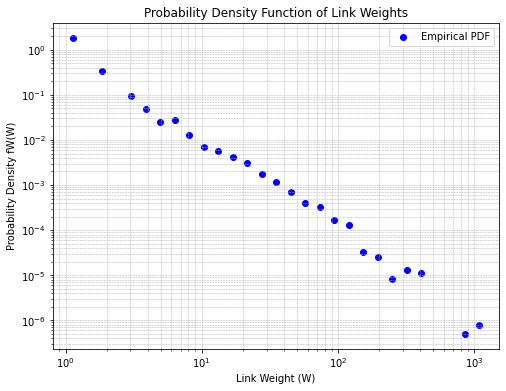

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define binning strategy: Use logarithmic bins for better power-law visibility
bins = np.logspace(np.log10(min(weights)), np.log10(max(weights)), num=30)

# Compute histogram
hist, bin_edges = np.histogram(weights, bins=bins, density=True)

# Compute bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot PDF
plt.figure(figsize=(8,6))
plt.scatter(bin_centers, hist, marker='o', label="Empirical PDF", color="blue")

# Log-log scale for power-law analysis
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Link Weight (W)")
plt.ylabel("Probability Density fW(W)")
plt.title("Probability Density Function of Link Weights")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()


The PDF represents the probability of encountering a link with a given weight.

In [11]:
import powerlaw

# Fit power-law model
fit = powerlaw.Fit(weights)

# Get exponent alpha
alpha = fit.power_law.alpha


Calculating best minimal value for power law fit


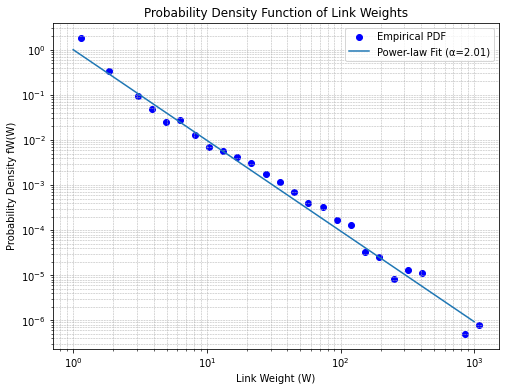

In [12]:
xvalues = np.logspace(0,3,5)
yvalues_manual = xvalues**-(alpha-0.6)
new_alpha = alpha-0.6
yvalues_fited = xvalues**-alpha

plt.figure(figsize=(8,6))
plt.scatter(bin_centers, hist, marker='o', label="Empirical PDF", color="blue")
plt.plot(xvalues,yvalues_manual, label = f'Power-law Fit (α={new_alpha:.2f})')

# plt.plot(xvalues,yvalues_fited, label= 'alpha')


# Log-log scale for power-law analysis
plt.xscale("log")
plt.yscale("log")

# Labels and title
plt.xlabel("Link Weight (W)")
plt.ylabel("Probability Density fW(W)")
plt.title("Probability Density Function of Link Weights")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

# B

In [9]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the dataset
file_path = "/Users/martijn/Documents/belangrijk/Complex/SFHH2025.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")
df.columns = ["id1", "id2", "time_step"]

In [21]:
# Convert DataFrame to list of tuples (node_i, node_j, time_step)
Gdata = df[['id1', 'id2', 'time_step']].values.tolist()

# Get the number of unique nodes dynamically
N = len(set(df["id1"]).union(set(df["id2"])))

# Get the last time step dynamically
T = df["time_step"].max()

def simulate_spreading(seed, Gdata, T):
    """Simulates the information spreading process from a given seed node."""
    infected = set([seed])
    I_t = np.zeros(T + 1)
    I_t[0] = 1  # Seed is infected at t=0

    contacts = defaultdict(list)
    for node_i, node_j, time in Gdata:  # Corrected tuple order
        contacts[time].append((node_i, node_j))

    for t in range(1, T + 1):
        new_infected = set()
        for node_i, node_j in contacts[t]:
            if node_i in infected and node_j not in infected:
                new_infected.add(node_j)
            elif node_j in infected and node_i not in infected:
                new_infected.add(node_i)
        infected.update(new_infected)
        I_t[t] = len(infected)

    return I_t

# Run simulations
all_I_t = np.zeros((N, T + 1))
for seed in range(N):
    all_I_t[seed] = simulate_spreading(seed, Gdata, T)

# Calculate average and standard deviation
E_I_t = np.mean(all_I_t, axis=0)
Var_I_t = np.std(all_I_t, axis=0)

B8

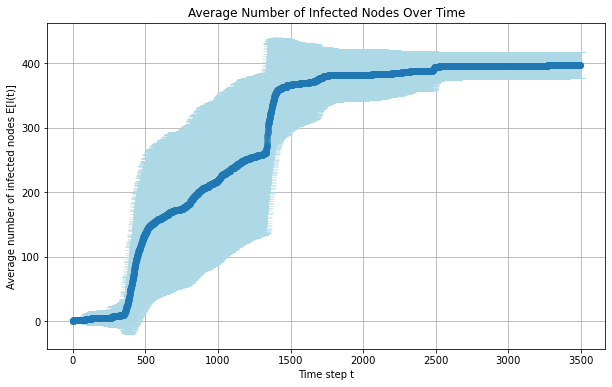

In [11]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(range(T + 1), E_I_t, yerr=Var_I_t, fmt='-o', ecolor='lightblue', alpha=0.5, capsize=5)
plt.xlabel('Time step t')
plt.ylabel('Average number of infected nodes E[I(t)]')
plt.title('Average Number of Infected Nodes Over Time')
plt.grid(True)
plt.show()

B9

In [12]:
# Parameters
threshold = 0.8 * N  # 80% of the nodes

# Calculate the time to infect 80% of the nodes for each seed
time_to_infect_80 = np.full(N, T + 1)  # Initialize with a value greater than T
for seed in range(N):
    I_t = all_I_t[seed]  # Use precomputed simulation results
    if np.any(I_t >= threshold):
        time_to_infect_80[seed] = np.argmax(I_t >= threshold)

# Rank the nodes based on the time to infect 80% of the nodes
ranked_nodes = np.argsort(time_to_infect_80)
R = ranked_nodes  # Node indices are already 0-based


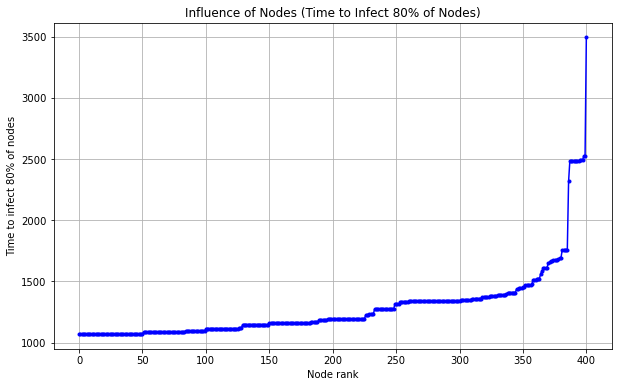

Ranking vector R: [ 39  58  30  33  34  35  68  65  41  42  43  44  45  46  47  48  64  51
  52  53  54  60  56  57  27  26  29  24   1   2   5   6   7   8   9  10
  11  12  13  25  15  14  17  23  22  16  21  20  59  18  19  71  70  72
  73  69  75  76  74  61  55  38  37  40  80  95 125  87  86  81 117 118
  97  98  99 100 101 102  94  78  77  67  66  79 131 113 108 107 106 105
 104 103 114 111 110 133 130 129 127 132 134 126 122 144 115 141 140 138
 137 136 119 135  88 109  84  85   4   3  89  83 112  90  91  92  93  82
 145 128 151 143 142 147 148 149 150 153 154 146 183 156 124 164 167  62
  63 165 160 123 161 162 191 158 184 189 185 193 190 198 195  28 197 196
 194  50 180  49 116 120 121 139  96 179 188 187 186 201 192 200  31  32
  36 163 159 181 152 177 155 166 157 178 208 207 202 199 204 182 212 206
 205 214 203 213 220 222 223 219 226 227 218 217 216 215 221 169 211 170
 171 168 173 174 172 175 176 210 231 230 224 225 232 235 233 209 240 251
 242 248 252 247 246 243 250 228 

In [13]:
# Plot the influence of each node in decreasing order
plt.figure(figsize=(10, 6))
plt.plot(np.sort(time_to_infect_80), '.-', color='blue')
plt.xlabel('Node rank')
plt.ylabel('Time to infect 80% of nodes')
plt.title('Influence of Nodes (Time to Infect 80% of Nodes)')
plt.grid(True)
plt.show()

# Print the ranking vector R
print("Ranking vector R:", R)

In [14]:

#Calculate the sorted influence times R
threshold = 0.8 * N  # 80% threshold

influence_times = {}  # node -> time to infect at least 80% of nodes

for node in range(N):
    crossing_time = T + 1  # default if node never infects 80%
    for t in range(T + 1):
        if all_I_t[node][t] >= threshold:
            crossing_time = t
            break
    influence_times[node] = crossing_time

# Now 'influence_time' holds the earliest time each seed infects >=80% of the network.
# Next, sort the dictionary by time value:
sorted_influence_times = sorted(influence_times.items(), key=lambda x: x[1])

print("Influence times (node -> time to infect 80%):")
for node, t_val in sorted_influence_times:
    print(f"Node {node}: {t_val}")

Influence times (node -> time to infect 80%):
Node 1: 1070
Node 2: 1070
Node 5: 1070
Node 6: 1070
Node 7: 1070
Node 8: 1070
Node 9: 1070
Node 10: 1070
Node 11: 1070
Node 12: 1070
Node 13: 1070
Node 14: 1070
Node 15: 1070
Node 16: 1070
Node 17: 1070
Node 18: 1070
Node 19: 1070
Node 20: 1070
Node 21: 1070
Node 22: 1070
Node 23: 1070
Node 24: 1070
Node 25: 1070
Node 26: 1070
Node 27: 1070
Node 29: 1070
Node 30: 1070
Node 33: 1070
Node 34: 1070
Node 35: 1070
Node 39: 1070
Node 41: 1070
Node 42: 1070
Node 43: 1070
Node 44: 1070
Node 45: 1070
Node 46: 1070
Node 47: 1070
Node 48: 1070
Node 51: 1070
Node 52: 1070
Node 53: 1070
Node 54: 1070
Node 56: 1070
Node 57: 1070
Node 58: 1070
Node 59: 1070
Node 60: 1070
Node 64: 1070
Node 65: 1070
Node 68: 1070
Node 37: 1084
Node 38: 1084
Node 40: 1084
Node 55: 1084
Node 61: 1084
Node 69: 1084
Node 70: 1084
Node 71: 1084
Node 72: 1084
Node 73: 1084
Node 74: 1084
Node 75: 1084
Node 76: 1084
Node 80: 1084
Node 95: 1084
Node 66: 1086
Node 67: 1086
Node 77: 

In [15]:
# Add weights to the edges corresponding to the total number of contacts between the corresponding two nodes
contacts = df.groupby(['id1', 'id2']).size().reset_index(name='contacts')

# Add the weights to the edges
for index, row in contacts.iterrows():
    G[row['id1']][row['id2']]['weight'] = row['contacts']

In [16]:
# Compute the degree of each node
degree_dict = dict(G.degree())

# Compute the strength of each node using the weight attribute
strength_dict = {}
for node in G.nodes:
    strength_dict[node] = sum(data['weight'] for _, _, data in G.edges(node, data=True))

# Rank the nodes by degree
ranked_by_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Rank the nodes by strength
ranked_by_strength = sorted(strength_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top 10 nodes by degree and strength
verbose = False
if verbose:
    print("Top 10 nodes by degree:")
    for node, degree in ranked_by_degree[:10]:
        print(f"Node {node}: Degree {degree}")

    print("\nTop 10 nodes by strength:")
    for node, strength in ranked_by_strength[:10]:
        print(f"Node {node}: Strength {strength}")

In [17]:
# 1) Define or load your graph G and compute all_I_t beforehand:
#    (Assumes you've already got N, T, all_I_t, etc.)

# 2) Compute the influence_times dictionary:
threshold = 0.8 * N  # 80% threshold
influence_times = {}  # node -> time to infect at least 80% of nodes

for node in range(N):
    crossing_time = T + 1  # default if node never infects 80%
    for t in range(T + 1):
        if all_I_t[node][t] >= threshold:
            crossing_time = t
            break
    influence_times[node] = crossing_time

# Sort by the time value and store as sorted_influence_times
sorted_influence_times = sorted(influence_times.items(), key=lambda x: x[1])

# 3) Also assume you have degree_dict, strength_dict, etc., and have
#    ranked_by_degree = sorted(degree_dict.items(), key=..., reverse=True)
#    ranked_by_strength = sorted(strength_dict.items(), key=..., reverse=True)

def calculate_recognition_rates(f, iterations=1000):
    """Computes r_RD(f) and r_RS(f) over multiple random tie-break iterations."""
    num_top_nodes = int(f * len(G.nodes))

    r_RD_f_degree_total = 0
    r_RS_f_strength_total = 0

    for _ in range(iterations):
        # Top f nodes by influence, degree, and strength
        top_f_influence_nodes = [node for node, _ in sorted_influence_times[:num_top_nodes]]
        top_f_degree_nodes = [node for node, _ in ranked_by_degree[:num_top_nodes]]
        top_f_strength_nodes = [node for node, _ in ranked_by_strength[:num_top_nodes]]

        def handle_ties(top_nodes, sorted_nodes, metric_dict):
            """Resolves ties at the boundary by randomly choosing among tied nodes."""
            last_value = sorted_nodes[num_top_nodes - 1][1]
            tied_nodes = [n for n, val in sorted_nodes if val == last_value]

            selected_tied_nodes = [n for n in top_nodes if metric_dict[n] == last_value]
            other_nodes = [n for n in top_nodes if metric_dict[n] != last_value]

            if len(selected_tied_nodes) < len(tied_nodes):
                # We only fill as many 'tied' slots as required
                remaining_slots = len(selected_tied_nodes)
                additional_nodes = np.random.choice(tied_nodes, remaining_slots, replace=False).tolist()
                top_nodes = other_nodes + additional_nodes

            return top_nodes

        # Resolve ties for each ranking
        top_f_influence_nodes = handle_ties(top_f_influence_nodes, sorted_influence_times, influence_times)
        top_f_degree_nodes = handle_ties(top_f_degree_nodes, ranked_by_degree, degree_dict)
        top_f_strength_nodes = handle_ties(top_f_strength_nodes, ranked_by_strength, strength_dict)

        # Calculate the intersection
        intersection_nodes_degree = set(top_f_influence_nodes).intersection(top_f_degree_nodes)
        intersection_nodes_strength = set(top_f_influence_nodes).intersection(top_f_strength_nodes)

        r_RD_f_degree_total += len(intersection_nodes_degree) / num_top_nodes
        r_RS_f_strength_total += len(intersection_nodes_strength) / num_top_nodes

    r_RD_f_degree = r_RD_f_degree_total / iterations
    r_RS_f_strength = r_RS_f_strength_total / iterations
    return r_RD_f_degree, r_RS_f_strength

# 4) Now define f_values and capture results
f_values = [i/100 for i in range(5, 51, 5)]
recognition_rates = {'f': [], 'r_RD_f_degree': [], 'r_RS_f_strength': []}

for f in f_values:
    r_RD_f_degree, r_RS_f_strength = calculate_recognition_rates(f)
    recognition_rates['f'].append(f)
    recognition_rates['r_RD_f_degree'].append(r_RD_f_degree)
    recognition_rates['r_RS_f_strength'].append(r_RS_f_strength)
    
verbose = False
if verbose:
    df_recognition_rates = pd.DataFrame(recognition_rates)
    print(df_recognition_rates)

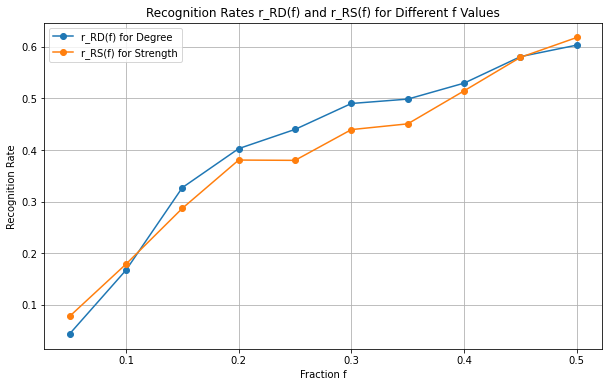

In [18]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(recognition_rates['f'], recognition_rates['r_RD_f_degree'], label='r_RD(f) for Degree', marker='o')
plt.plot(recognition_rates['f'], recognition_rates['r_RS_f_strength'], label='r_RS(f) for Strength', marker='o')
plt.xlabel('Fraction f')
plt.ylabel('Recognition Rate')
plt.title('Recognition Rates r_RD(f) and r_RS(f) for Different f Values')
plt.legend()
plt.grid(True)
plt.show()

      f  r_RD_f_degree  r_RS_f_strength  r_RZ_f_earliest
0  0.05       0.047550         0.077900         0.352200
1  0.10       0.165800         0.176350         0.606325
2  0.15       0.327100         0.286767         0.839800
3  0.20       0.402437         0.380787         0.861275
4  0.25       0.440000         0.380000         0.790000
5  0.30       0.489667         0.439650         0.869150
6  0.35       0.498793         0.450729         0.907957
7  0.40       0.529831         0.514225         0.925481
8  0.45       0.581350         0.580072         0.906361
9  0.50       0.603245         0.618225         0.955000


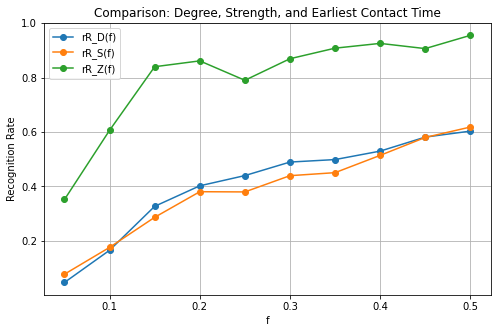

In [19]:
# 1) Ensure you've loaded df and built your graph G. Already done above.
#    We also assume you have Gdata = df[['id1', 'id2', 'time_step']].values.tolist()

# 2) Determine earliest contact time Z for each node.
#    Initialize with a large number, then update with the minimum time observed.
earliest_time_dict = {node: float('inf') for node in G.nodes()}
for node_i, node_j, time_step in Gdata:
    earliest_time_dict[node_i] = min(earliest_time_dict[node_i], time_step)
    earliest_time_dict[node_j] = min(earliest_time_dict[node_j], time_step)

# Convert any nodes that never appear in Gdata to time 0 or some default
# (depending on how you want to handle nodes not in Gdata).
for node in earliest_time_dict:
    if earliest_time_dict[node] == float('inf'):
        earliest_time_dict[node] = 0

# 3) Sort the nodes by earliest contact time (ascending: earliest contact means top rank).
ranked_by_earliest_time = sorted(earliest_time_dict.items(), key=lambda x: x[1])

# 4) Suppose you already have:
#    - sorted_influence_times: time to infect 80% (in ascending order)
#    - ranked_by_degree
#    - ranked_by_strength
#    - plus your all_I_t array, etc.

def calculate_recognition_rates_including_Z(f, iterations=1000):
    """
    Computes r_RD(f), r_RS(f), and r_RZ(f) over multiple random tie-break iterations.
    Returns these three recognition rates as a tuple.
    """
    num_top_nodes = int(f * len(G.nodes))
    
    r_RD_f_degree_total = 0
    r_RS_f_strength_total = 0
    r_RZ_f_earliest_time_total = 0

    for _ in range(iterations):
        # Top f nodes by influence, degree, strength, earliest contact
        top_f_influence_nodes    = [node for node, _ in sorted_influence_times[:num_top_nodes]]
        top_f_degree_nodes       = [node for node, _ in ranked_by_degree[:num_top_nodes]]
        top_f_strength_nodes     = [node for node, _ in ranked_by_strength[:num_top_nodes]]
        top_f_earliest_time_nodes = [node for node, _ in ranked_by_earliest_time[:num_top_nodes]]
        
        # Simple tie-break function (same as before)
        def handle_ties(top_nodes, sorted_nodes, metric_dict):
            if num_top_nodes < 1 or num_top_nodes > len(sorted_nodes):
                return top_nodes
            last_value = sorted_nodes[num_top_nodes - 1][1]
            tied_nodes = [n for n, val in sorted_nodes if val == last_value]

            selected_tied_nodes = [n for n in top_nodes if metric_dict[n] == last_value]
            other_nodes = [n for n in top_nodes if metric_dict[n] != last_value]

            if len(selected_tied_nodes) < len(tied_nodes):
                # We only fill as many 'tied' slots as needed
                needed = len(selected_tied_nodes)
                additional_nodes = np.random.choice(tied_nodes, needed, replace=False).tolist()
                top_nodes = other_nodes + additional_nodes
            return top_nodes

        # Tie resolution for each ranking
        top_f_influence_nodes    = handle_ties(top_f_influence_nodes, sorted_influence_times, influence_times)
        top_f_degree_nodes       = handle_ties(top_f_degree_nodes, ranked_by_degree, degree_dict)
        top_f_strength_nodes     = handle_ties(top_f_strength_nodes, ranked_by_strength, strength_dict)
        top_f_earliest_time_nodes = handle_ties(top_f_earliest_time_nodes, ranked_by_earliest_time, earliest_time_dict)
        
        # Intersections with the influence ranking
        intersection_degree   = set(top_f_influence_nodes).intersection(top_f_degree_nodes)
        intersection_strength = set(top_f_influence_nodes).intersection(top_f_strength_nodes)
        intersection_earliest = set(top_f_influence_nodes).intersection(top_f_earliest_time_nodes)

        r_RD_f_degree_total   += len(intersection_degree)   / num_top_nodes
        r_RS_f_strength_total += len(intersection_strength) / num_top_nodes
        r_RZ_f_earliest_time_total += len(intersection_earliest) / num_top_nodes

    r_RD_f_degree   = r_RD_f_degree_total   / iterations
    r_RS_f_strength = r_RS_f_strength_total / iterations
    r_RZ_f_earliest = r_RZ_f_earliest_time_total / iterations

    return r_RD_f_degree, r_RS_f_strength, r_RZ_f_earliest

# 5) Collect results for each fraction f
f_values = [i/100 for i in range(5, 51, 5)]
recognition_rates = {
    'f': [],
    'r_RD_f_degree': [],
    'r_RS_f_strength': [],
    'r_RZ_f_earliest': [],
}

for f in f_values:
    r_degree, r_strength, r_earliest = calculate_recognition_rates_including_Z(f)
    recognition_rates['f'].append(f)
    recognition_rates['r_RD_f_degree'].append(r_degree)
    recognition_rates['r_RS_f_strength'].append(r_strength)
    recognition_rates['r_RZ_f_earliest'].append(r_earliest)

# 6) (Optional) Convert to DataFrame and plot
df_recognition_rates = pd.DataFrame(recognition_rates)
print(df_recognition_rates)

plt.figure(figsize=(8,5))
plt.plot(df_recognition_rates['f'], df_recognition_rates['r_RD_f_degree'], 'o-', label='rR_D(f)')
plt.plot(df_recognition_rates['f'], df_recognition_rates['r_RS_f_strength'], 'o-', label='rR_S(f)')
plt.plot(df_recognition_rates['f'], df_recognition_rates['r_RZ_f_earliest'], 'o-', label='rR_Z(f)')
plt.xlabel('f')
plt.ylabel('Recognition Rate')
plt.title('Comparison: Degree, Strength, and Earliest Contact Time')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
print(all_I_t[4])

[  1.   2.   2. ... 401. 401. 401.]


In [28]:
# Define the threshold for 10% of the nodes
total_nodes = len(G.nodes)
threshold_10_percent = 0.1 * total_nodes

# Dictionary to store the time to infect 10% of the nodes for each seed node
time_to_infect_10_percent = {}

# Iterate through each node and simulate the virus spread
for node in G.nodes:
    result = simulate_spreading(node, Gdata, T)
    time_to_infect_10_percent[node] = np.argmax(result >= threshold_10_percent)
            

# Rank the nodes based on the time to infect 10% of the nodes
ranked_by_time_to_infect_10_percent = sorted(time_to_infect_10_percent.items(), key=lambda x: x[1])

# Extract the ranking into a vector R*
R_star = [node for node, _ in ranked_by_time_to_infect_10_percent]

# Print the ranking vector R*
print("Ranking vector R* based on time to infect 10% of the nodes:")
print(R_star)

Ranking vector R* based on time to infect 10% of the nodes:
[7, 8, 17, 9, 10, 11, 12, 13, 14, 15, 16, 1, 20, 24, 25, 18, 19, 23, 27, 26, 2, 30, 35, 5, 6, 21, 22, 33, 34, 46, 47, 48, 53, 54, 29, 39, 41, 42, 43, 44, 45, 56, 51, 52, 59, 57, 58, 60, 61, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 37, 38, 80, 40, 55, 95, 97, 98, 100, 101, 102, 81, 66, 67, 86, 87, 79, 77, 78, 99, 94, 107, 108, 114, 111, 103, 117, 118, 125, 127, 132, 133, 140, 82, 83, 84, 85, 88, 89, 90, 91, 92, 93, 104, 105, 106, 119, 129, 130, 141, 110, 109, 112, 126, 115, 122, 134, 135, 136, 113, 144, 4, 3, 128, 137, 145, 138, 147, 131, 139, 143, 153, 154, 160, 161, 146, 148, 149, 150, 123, 124, 142, 162, 164, 179, 116, 96, 62, 63, 151, 156, 167, 165, 183, 31, 32, 36, 158, 163, 184, 185, 159, 180, 189, 190, 193, 194, 195, 196, 197, 198, 186, 28, 191, 187, 188, 49, 50, 152, 155, 157, 181, 192, 120, 121, 177, 199, 201, 200, 178, 166, 182, 204, 207, 208, 202, 210, 211, 205, 206, 213, 203, 214, 216, 219, 220, 221, 212, 215, 21

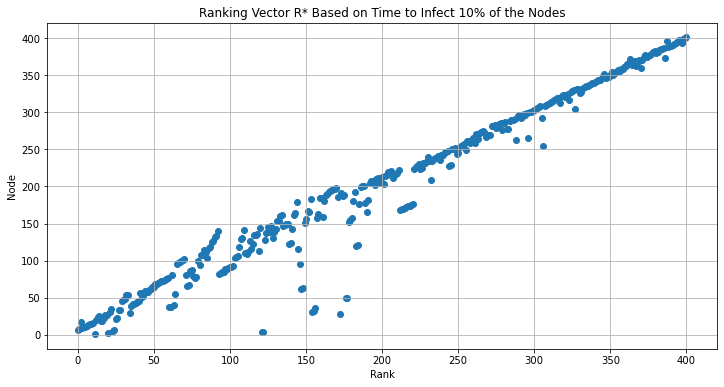

In [38]:
# Plot the ranking vector R*
plt.figure(figsize=(12, 6))
plt.scatter(range(len(R_star)),R_star, marker='o')
plt.xlabel('Rank')
plt.ylabel('Node')
plt.title('Ranking Vector R* Based on Time to Infect 10% of the Nodes')
plt.grid(True)
plt.show()

In [33]:
# Define the threshold for 80% of the nodes
threshold_80_percent = 0.8 * total_nodes

# Dictionary to store the average time to reach the top 80% of nodes for each seed node
average_time_to_reach_80_percent = {}

# Iterate through each node and simulate the virus spread
for node in G.nodes:
    result = simulate_spreading(node, Gdata, T)
    infected_times = result
    
    # Sort the nodes based on the time they get infected
    sorted_infected_times = sorted(enumerate(infected_times), key=lambda x: x[1])
    
    # Select the top 80% of nodes that are reached earliest in time
    top_80_percent_nodes = sorted_infected_times[:int(threshold_80_percent)]
    
    # Calculate the average time for these nodes
    average_time = np.mean([time for _, time in top_80_percent_nodes])
    average_time_to_reach_80_percent[node] = average_time

# Print the average time to reach the top 80% of nodes for each seed node
verbose = False
if verbose:
    for node, time in average_time_to_reach_80_percent.items():
        print(f"Node {node}: Average time to reach 80% of nodes: {time}")

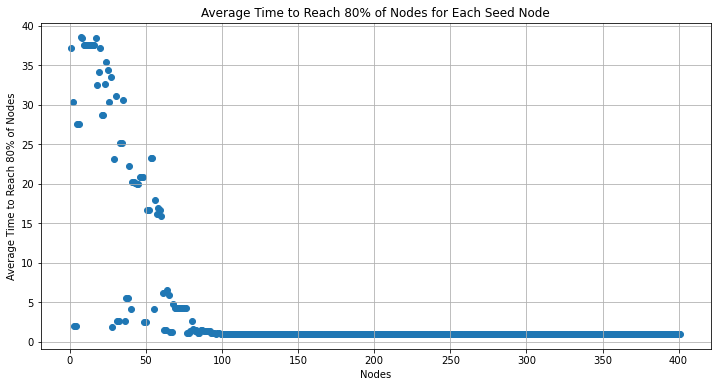

In [35]:
# Extract the nodes and their corresponding average times
nodes = list(average_time_to_reach_80_percent.keys())
average_times = list(average_time_to_reach_80_percent.values())

# Plot the average time to reach 80% of the nodes for each seed node
plt.figure(figsize=(12, 6))
plt.scatter(nodes, average_times)
plt.xlabel('Nodes')
plt.ylabel('Average Time to Reach 80% of Nodes')
plt.title('Average Time to Reach 80% of Nodes for Each Seed Node')
plt.grid(True)
plt.show()